# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
#Read the dataset from local copy and load into a dataframe
cancer_df = pd.read_csv("breast-cancer-wisconsin-data.csv")

#sanity check
#Display the top 10 rows
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
#Shape and summary statistics of the dataset
print("Shape of the dateset:",cancer_df.shape)

#There are 699 records with 11 total columns including ID and class (target)

#datatypes of each of the column
print("Datatypes of each column \n")
print(cancer_df.info())

#No direct null value seen based on the counts. There are 699 records
#All are numeric columns
#We can remove ID
#We will also remove Class column for PCA since that is the target variable

Shape of the dateset: (699, 11)
Datatypes of each column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB
None


In [5]:
#Summary stats using describe
print("Summary statistics of the dataset \n")
cancer_df.describe().T

#Most of the features have the range from 1 to 10
#ID can be ignored

Summary statistics of the dataset 



,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


2    458
4    241
Name: Class, dtype: int64


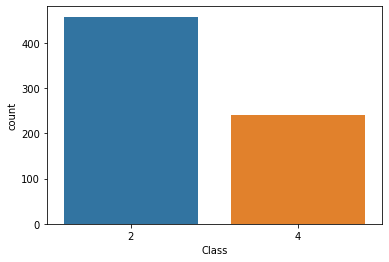

In [6]:
#Check the class distribution
print(cancer_df["Class"].value_counts())

sns.countplot(cancer_df["Class"])

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [7]:
# We could see "?" values in column, this should be removed from data set
# Check for missing value in any other column

#Check for ? in the dataset
cancer_df[cancer_df == "?"].count()

#We can see ? marks in BAre Nucleoli column only. There are 16 records

C:\Users\rejimonr\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [8]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having ?

#Replace ? with NaN
cancer_df.replace("?",np.NaN,inplace=True)

#Lets check that now we have no ? and have NaN
cancer_df[cancer_df == "?"].count()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [9]:
#Check the count of NaNs now
cancer_df.isna().sum()

ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [10]:
#Display the items with missing value in Bare Nuclei feature
cancer_df[cancer_df["Bare Nuclei"].isna()]

#This is spread across both the classes

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


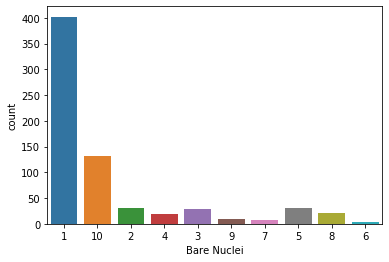

In [11]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

#Since the records are less..lets try to impute
#Lets first check the distribution of Bare Nuclei feature
sns.countplot(cancer_df["Bare Nuclei"])

In [12]:
#Get the mode value for replacing
cancer_df["Bare Nuclei"].mode()

0    1
dtype: object

In [13]:
##Based on the above distribution lets go replacing the missing values with mode of the column
cancer_df["Bare Nuclei"].fillna(1,inplace=True)

#Check again to see if all the missing values have gone away
cancer_df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [14]:
#Identify if there are any duplicate records
cancer_df.duplicated().sum()

#There are 8 duplicate records which need to be removed

8

In [15]:
#Drop duplicates
cancer_df.drop_duplicates(inplace=True)

In [16]:
#Check again if duplicate are there now
cancer_df.duplicated().sum()

#No duplicates now

0

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [17]:
# Check for correlation of variable
#Lets convert the Bare Nuclei to numeric before going forward
cancer_df["Bare Nuclei"] = cancer_df["Bare Nuclei"].astype("int")

#check the datatypes once again
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 698
Data columns (total 11 columns):
ID                             691 non-null int64
ClumpThickness                 691 non-null int64
Cell Size                      691 non-null int64
Cell Shape                     691 non-null int64
Marginal Adhesion              691 non-null int64
Single Epithelial Cell Size    691 non-null int64
Bare Nuclei                    691 non-null int32
Normal Nucleoli                691 non-null int64
Bland Chromatin                691 non-null int64
Mitoses                        691 non-null int64
Class                          691 non-null int64
dtypes: int32(1), int64(10)
memory usage: 62.1 KB


In [18]:
#Lets check the correlation among the columns
cancer_df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059165,-0.043273,-0.042184,-0.066230,-0.047642,-0.091235,-0.059645,-0.054001,-0.036001,-0.079459
ClumpThickness,-0.059165,1.000000,0.643340,0.653752,0.487949,0.517448,0.590841,0.561076,0.535712,0.350354,0.716938
Cell Size,-0.043273,0.643340,1.000000,0.905420,0.713117,0.747111,0.684791,0.759525,0.727239,0.460064,0.817720
Cell Shape,-0.042184,0.653752,0.905420,1.000000,0.690989,0.714393,0.704382,0.738455,0.724693,0.440592,0.817693
Marginal Adhesion,-0.066230,0.487949,0.713117,0.690989,1.000000,0.608477,0.672719,0.669813,0.602453,0.417167,0.701371
Single Epithelial Cell Size,-0.047642,0.517448,0.747111,0.714393,0.608477,1.000000,0.580709,0.620518,0.634058,0.482644,0.681233
Bare Nuclei,-0.091235,0.590841,0.684791,0.704382,0.672719,0.580709,1.000000,0.672687,0.578417,0.343020,0.816787
Normal Nucleoli,-0.059645,0.561076,0.759525,0.738455,0.669813,0.620518,0.672687,1.000000,0.669059,0.343821,0.756618
Bland Chromatin,-0.054001,0.535712,0.727239,0.724693,0.602453,0.634058,0.578417,0.669059,1.000000,0.427644,0.715540
Mitoses,-0.036001,0.350354,0.460064,0.440592,0.417167,0.482644,0.343020,0.343821,0.427644,1.000000,0.424111


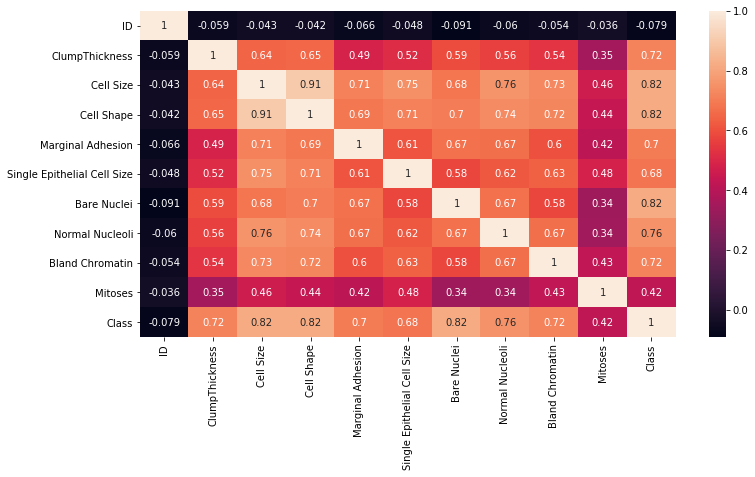

In [19]:
#Heat map for better visualization
plt.figure(figsize=(12,6))
sns.heatmap(cancer_df.corr(),annot=True)

In [20]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

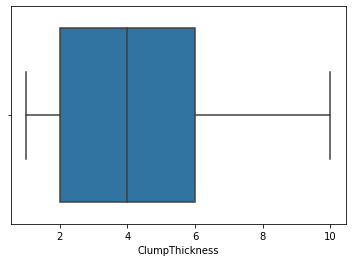

In [21]:
#Lets do some univariate and bivariate analysis
#ClumpThickness
sns.boxplot(cancer_df["ClumpThickness"])

#No outliers seen. Values are betweeen 2 and 6

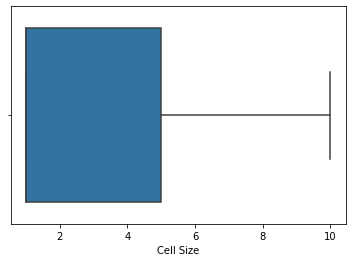

In [22]:
#Cell Size
sns.boxplot(cancer_df["Cell Size"])

#Again no outliers. Values are between 1 and 5

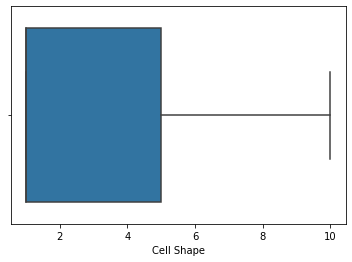

In [23]:
#Cell Shape
sns.boxplot(cancer_df["Cell Shape"])

#Again no outliers. Values are between 1 and 5

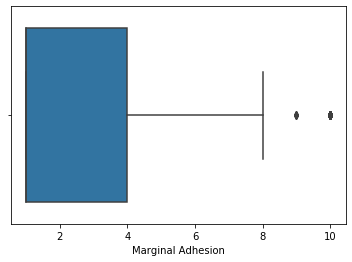

In [24]:
#Marginal Adhesion
sns.boxplot(cancer_df["Marginal Adhesion"])

#There are outliers in this record
#We will handle outliers below. 

In [25]:
pd.crosstab(cancer_df["Marginal Adhesion"],cancer_df["Class"])

Class,2,4
Marginal Adhesion,,
1,370,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


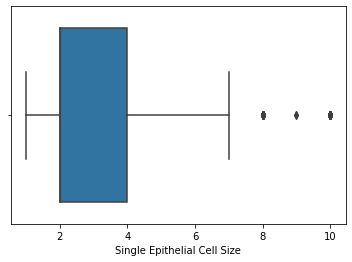

In [26]:
#Single Epithelial Cell Size
sns.boxplot(cancer_df["Single Epithelial Cell Size"])

#There are outliers in this record
#We will handle outliers below. 

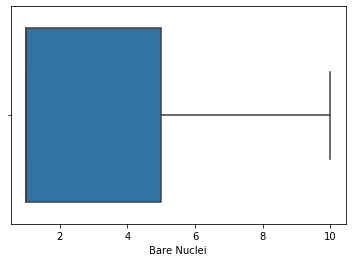

In [27]:
#Bare Nuclei
sns.boxplot(cancer_df["Bare Nuclei"])

#There are no outliers

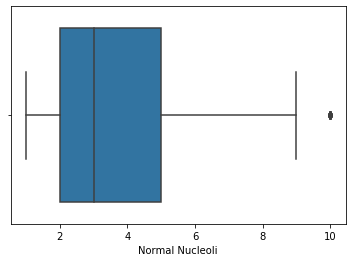

In [28]:
#Normal Nucleoli
sns.boxplot(cancer_df["Normal Nucleoli"])

#There are outliers in this record

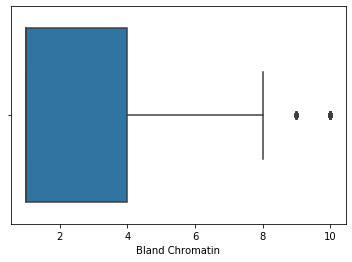

In [29]:
#Bland Chromatin
sns.boxplot(cancer_df["Bland Chromatin"])

#There are outliers in this record

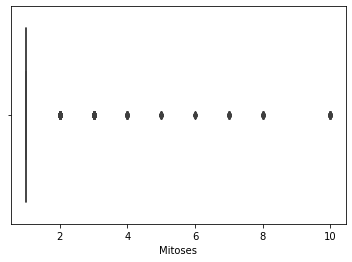

In [30]:
#box plot for Mitoses
sns.boxplot(cancer_df["Mitoses"])

#As expected very few values are outside 1 as outlier

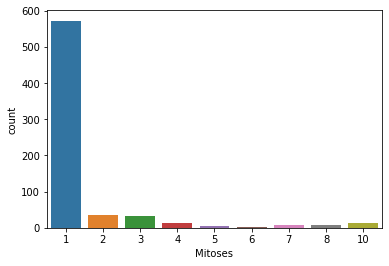

In [31]:
#Mitoses check the values to makse sense of the box plot         
sns.countplot(cancer_df["Mitoses"])

In [32]:
##We have outliers in the below columns..all are above the Q3. We will replace them with Q3 + 1.5
#Marginal Adhesion
#Single Epithelial Cell Size
#Normal Nucleoli
#Bland Chromatin
#Mitoses

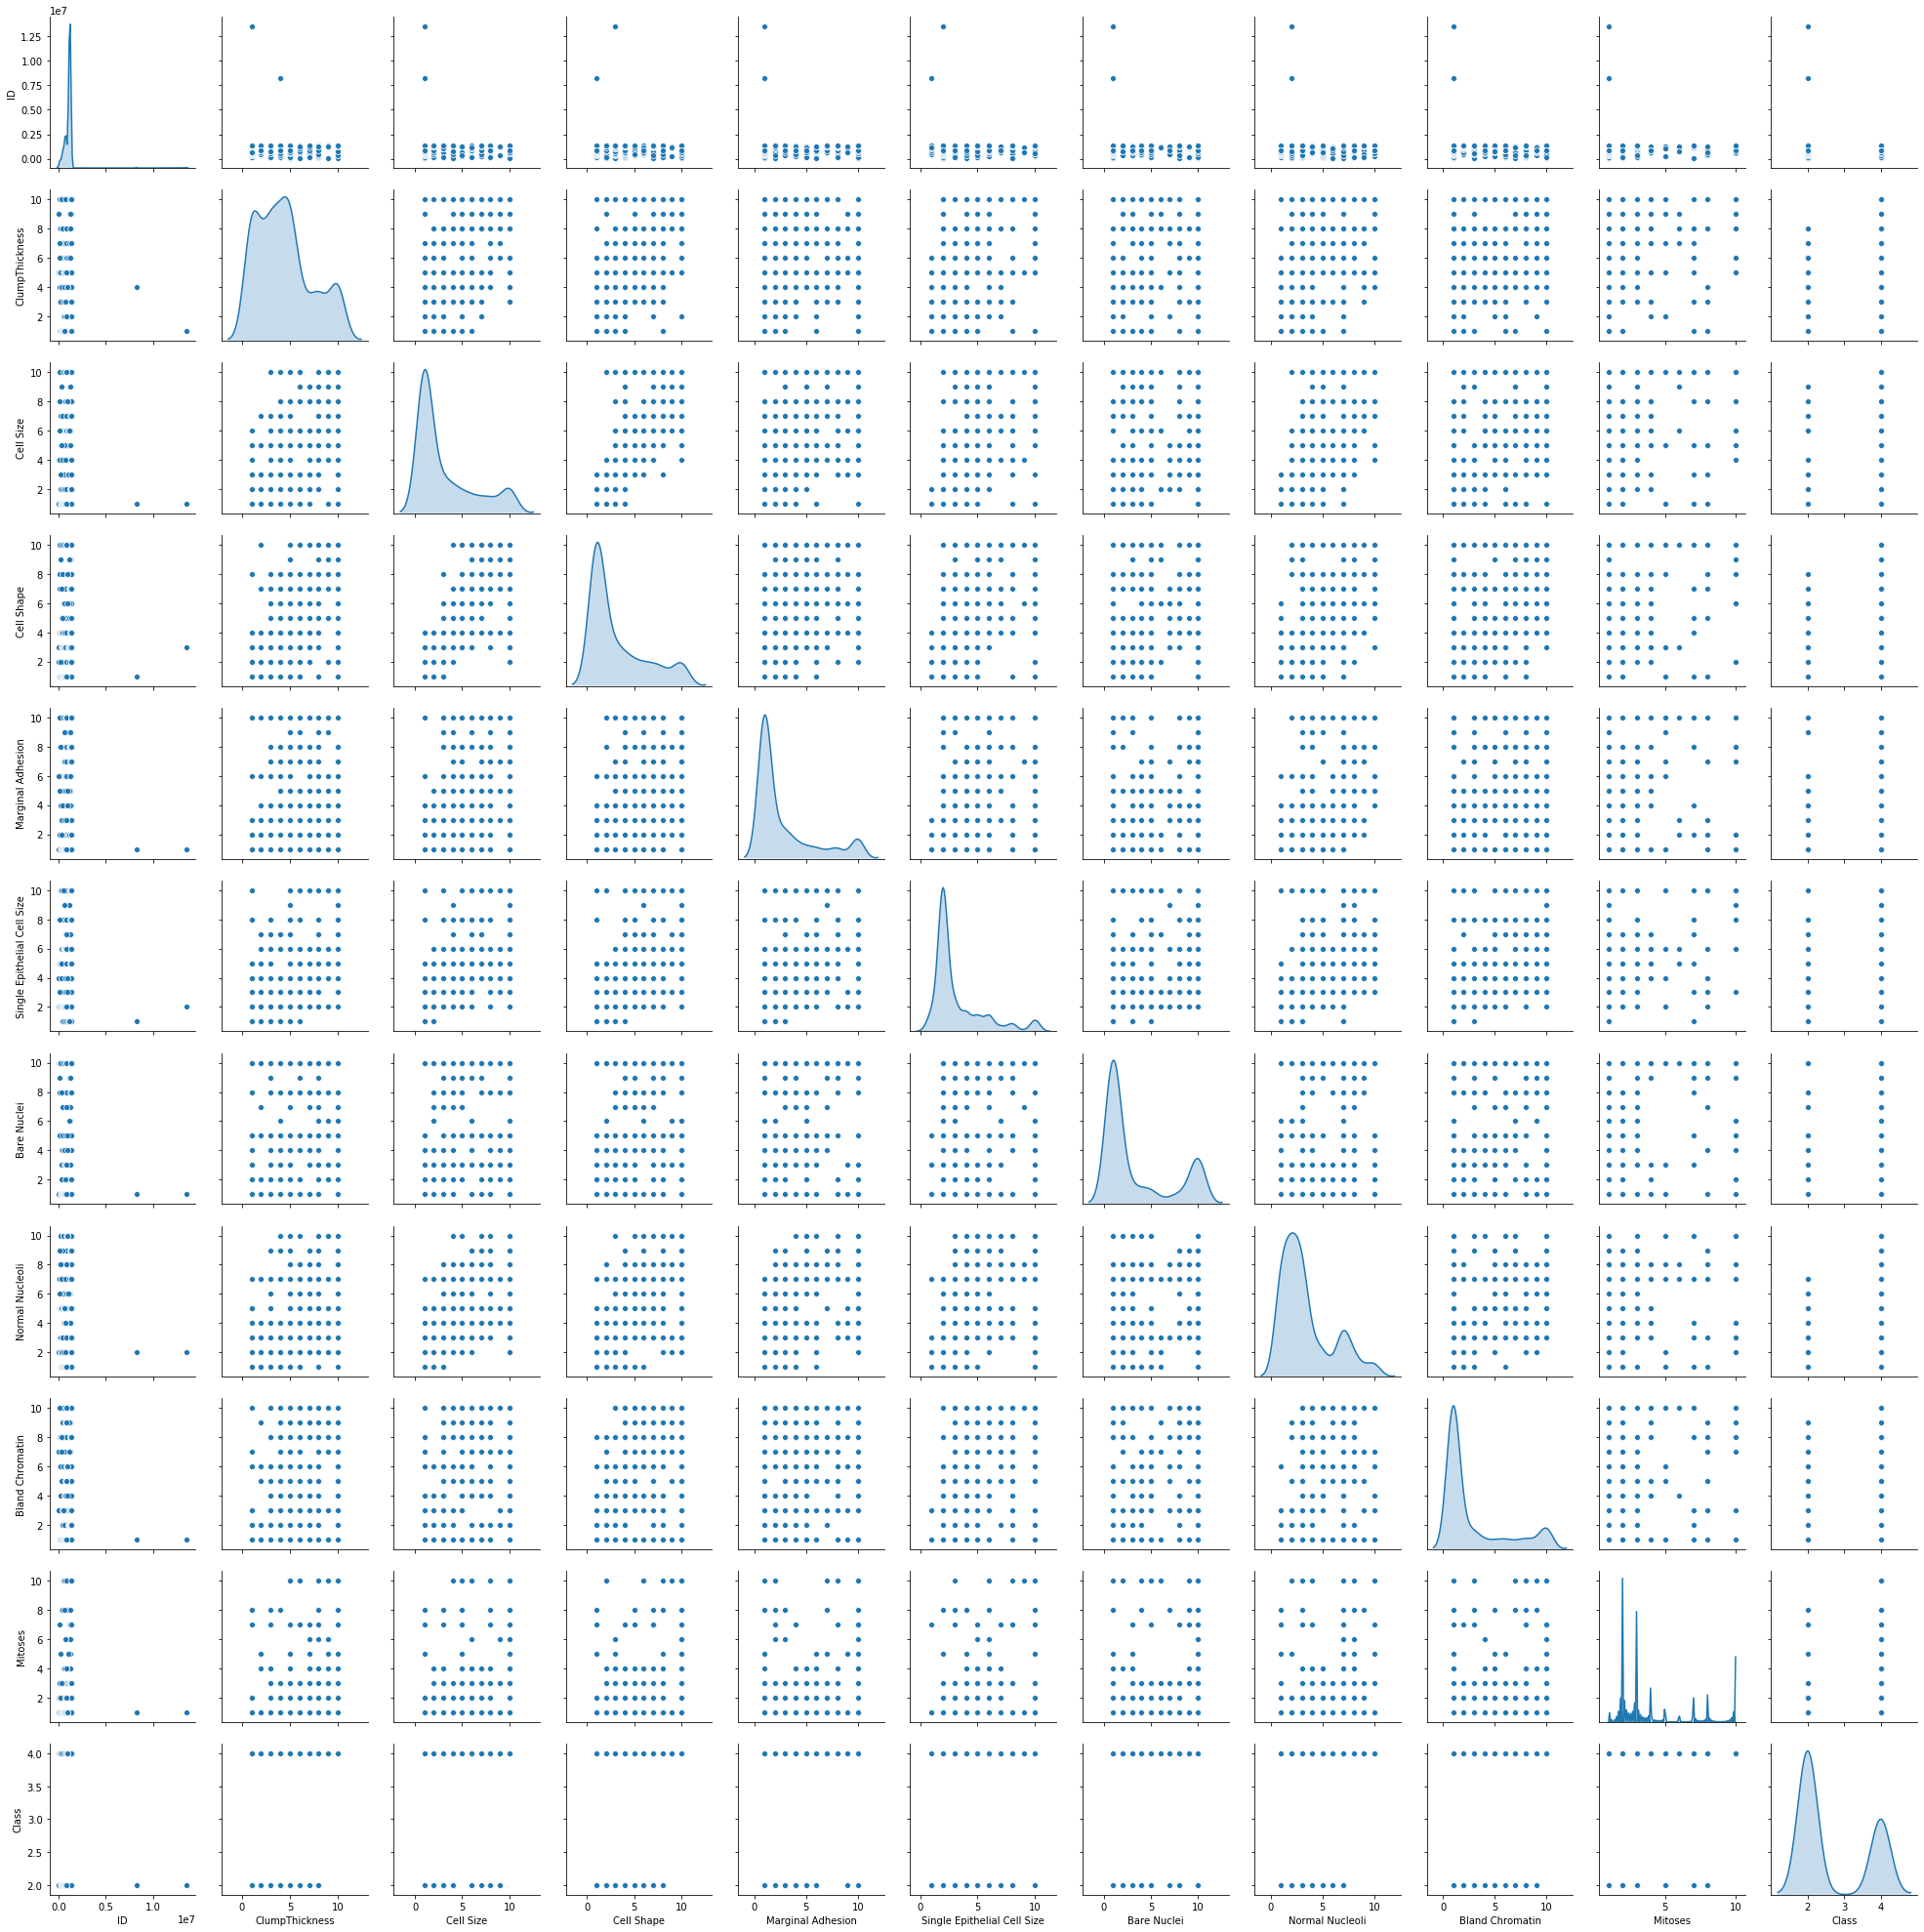

In [33]:
#Let us check for pair plots
sns.pairplot(cancer_df,diag_kind="kde")

In [ ]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [34]:
#Lets remove ID and Class now before proceeding
cancer_df.drop(["ID","Class"],axis=1,inplace=True)

In [35]:
#check the columns once again
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 691 non-null int64
Cell Size                      691 non-null int64
Cell Shape                     691 non-null int64
Marginal Adhesion              691 non-null int64
Single Epithelial Cell Size    691 non-null int64
Bare Nuclei                    691 non-null int32
Normal Nucleoli                691 non-null int64
Bland Chromatin                691 non-null int64
Mitoses                        691 non-null int64
dtypes: int32(1), int64(8)
memory usage: 71.3 KB


In [36]:
#Lets calculate the quantiles and find out the upper whisker value

Q1=cancer_df.quantile(0.25)
Q3=cancer_df.quantile(0.75)
IQR = Q3 - Q1

#get the max value before outliers
upper_values = cancer_df[cancer_df <= Q3 + IQR*1.5].max()

#Get the max
upper_values

ClumpThickness                 10.0
Cell Size                      10.0
Cell Shape                     10.0
Marginal Adhesion               8.0
Single Epithelial Cell Size     7.0
Bare Nuclei                    10.0
Normal Nucleoli                 9.0
Bland Chromatin                 8.0
Mitoses                         1.0
dtype: float64

In [37]:
#Replace the values which are greater than then upper whisker
cancer_df.where(cancer_df <= upper_values,upper_values,axis=1,inplace=True)

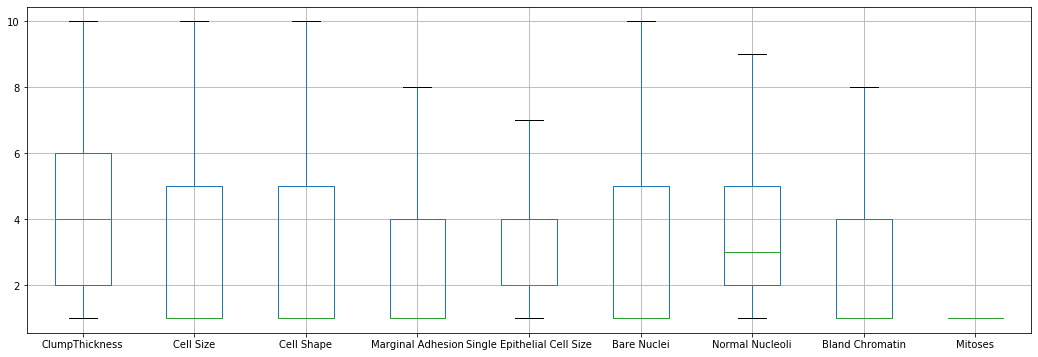

In [39]:
#Check the box plot to see no outliers now

cancer_df.boxplot(figsize=(18,6))

In [40]:
# We could see most of the outliers are now removed.

In [41]:
#Use standardscalar before proceeding with PCA
from sklearn.preprocessing import StandardScaler

In [42]:
sc = StandardScaler()
cancer_df_sc = sc.fit_transform(cancer_df)

In [43]:
#Check dataframe for sanity
cancer_df_sc

array([[ 0.2036669 , -0.70094014, -0.74420166, ..., -0.17177451,
        -0.63941398,  0.        ],
       [ 0.2036669 ,  0.28618548,  0.27008502, ..., -0.17177451,
        -0.25950421,  0.        ],
       [-0.50711   , -0.70094014, -0.74420166, ..., -0.17177451,
        -0.63941398,  0.        ],
       ...,
       [ 0.2036669 ,  2.26043672,  2.29865838, ...,  1.94025729,
         2.01995441,  0.        ],
       [-0.15172155,  1.60235298,  0.94627614, ...,  2.36266365,
         1.26013487,  0.        ],
       [-0.15172155,  1.60235298,  1.62246726, ...,  2.36266365,
         0.50031533,  0.        ]])

# Q6 Create a covariance matrix for identifying Principal components

In [44]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(cancer_df_sc.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[1.00144928 0.64427196 0.65469961 0.50590097 0.54679763 0.59169728
  0.56762926 0.54916006 0.        ]
 [0.64427196 1.00144928 0.90673173 0.73208571 0.78187347 0.68578334
  0.76049366 0.73237774 0.        ]
 [0.65469961 0.90673173 1.00144928 0.70685395 0.75174621 0.7054026
  0.73962492 0.72786954 0.        ]
 [0.50590097 0.73208571 0.70685395 1.00144928 0.66802794 0.6894016
  0.68888998 0.6336462  0.        ]
 [0.54679763 0.78187347 0.75174621 0.66802794 1.00144928 0.62654438
  0.66052652 0.69007149 0.        ]
 [0.59169728 0.68578334 0.7054026  0.6894016  0.62654438 1.00144928
  0.68153986 0.60131628 0.        ]
 [0.56762926 0.76049366 0.73962492 0.68888998 0.66052652 0.68153986
  1.00144928 0.68029344 0.        ]
 [0.54916006 0.73237774 0.72786954 0.6336462  0.69007149 0.60131628
  0.68029344 1.00144928 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [45]:
# Step 2- Get eigen values and eigen vector
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


In [46]:
print('Eigen Vectors \n', eigenvectors)
print('\n Eigen Values \n', eigenvalues)

Eigen Vectors 
 [[ 0.30802657 -0.8885963  -0.00115671  0.05178331  0.19786311 -0.26580817
  -0.02341361  0.04981373  0.        ]
 [ 0.38631585  0.04486965 -0.73940684  0.19753646 -0.35035138  0.03766393
  -0.20184662 -0.31320431  0.        ]
 [ 0.38305455 -0.02110467  0.65857118  0.1685626  -0.52582484  0.11839192
  -0.17214905 -0.2656139   0.        ]
 [ 0.34658319  0.33303002  0.05683766 -0.4237928   0.03790637 -0.73641046
  -0.19435829  0.06802823  0.        ]
 [ 0.35339017  0.21629591  0.07822198  0.33410738  0.57275776  0.26355436
  -0.51596816  0.21644759  0.        ]
 [ 0.34281919 -0.08437386 -0.07921482 -0.65155178 -0.14935899  0.5134799
   0.0286298   0.39720519  0.        ]
 [ 0.35638705  0.12132022  0.05892124 -0.15544019  0.43915884  0.14776948
   0.51938347 -0.58837132  0.        ]
 [ 0.34584341  0.16854513 -0.02154755  0.43586126 -0.1302129  -0.12904304
   0.59539676  0.52291561  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          

# Q8 Find variance and cumulative variance by each eigen vector

In [48]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('\nEigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.752052750670177, array([0.30802657, 0.38631585, 0.38305455, 0.34658319, 0.35339017,
       0.34281919, 0.35638705, 0.34584341, 0.        ])), (0.5362878607066079, array([-0.8885963 ,  0.04486965, -0.02110467,  0.33303002,  0.21629591,
       -0.08437386,  0.12132022,  0.16854513,  0.        ])), (0.4514803734814095, array([ 0.05178331,  0.19753646,  0.1685626 , -0.4237928 ,  0.33410738,
       -0.65155178, -0.15544019,  0.43586126,  0.        ])), (0.33861662437175694, array([-0.02341361, -0.20184662, -0.17214905, -0.19435829, -0.51596816,
        0.0286298 ,  0.51938347,  0.59539676,  0.        ])), (0.3047604074034362, array([ 0.04981373, -0.31320431, -0.2656139 ,  0.06802823,  0.21644759,
        0.39720519, -0.58837132,  0.52291561,  0.        ])), (0.2859906243166681, array([-0.26580817,  0.03766393,  0.11839192, -0.73641046,  0.26355436,
        0.5134799 ,  0.14776948, -0.12904304,  0.        ])), (0.2523300026115434, array([ 0.19786311, -0.35035138, -0.52582484,  0.03790637

In [50]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 9 entries as there are 9 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

print("Variance Explained", var_explained)
print("Cumulative Variance Explained", cum_var_exp)

Variance Explained [0.7179660633072392, 0.0669389695889217, 0.056353375127021044, 0.04226582323019394, 0.03803992060571107, 0.03569709312201535, 0.03149560452278669, 0.011243150496110845, 0.0]
Cumulative Variance Explained [0.71796606 0.78490503 0.84125841 0.88352423 0.92156415 0.95726124
 0.98875685 1.         1.        ]


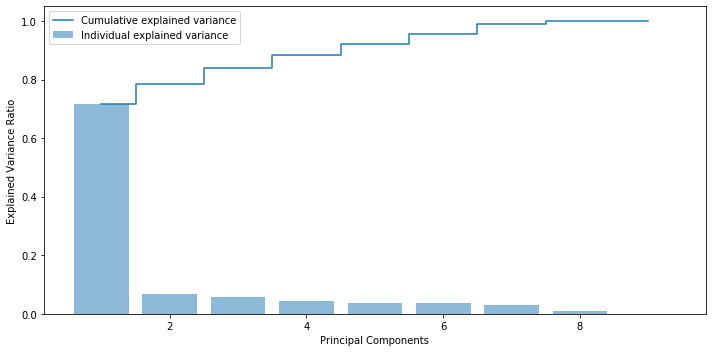

In [51]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenvalues.size + 1), var_explained, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [52]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA(n_components=9)

In [54]:
pca.fit(cancer_df_sc)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [55]:
pca.explained_variance_ratio_

array([0.71796606, 0.06693897, 0.05635338, 0.04226582, 0.03803992,
       0.03569709, 0.0314956 , 0.01124315, 0.        ])

In [56]:
pca.components_

array([[ 0.30802657,  0.38631585,  0.38305455,  0.34658319,  0.35339017,
         0.34281919,  0.35638705,  0.34584341, -0.        ],
       [-0.8885963 ,  0.04486965, -0.02110467,  0.33303002,  0.21629591,
        -0.08437386,  0.12132022,  0.16854513,  0.        ],
       [ 0.05178331,  0.19753646,  0.1685626 , -0.4237928 ,  0.33410738,
        -0.65155178, -0.15544019,  0.43586126,  0.        ],
       [ 0.02341361,  0.20184662,  0.17214905,  0.19435829,  0.51596816,
        -0.0286298 , -0.51938347, -0.59539676, -0.        ],
       [-0.04981373,  0.31320431,  0.2656139 , -0.06802823, -0.21644759,
        -0.39720519,  0.58837132, -0.52291561, -0.        ],
       [-0.26580817,  0.03766393,  0.11839192, -0.73641046,  0.26355436,
         0.5134799 ,  0.14776948, -0.12904304,  0.        ],
       [-0.19786311,  0.35035138,  0.52582484, -0.03790637, -0.57275776,
         0.14935899, -0.43915884,  0.1302129 ,  0.        ],
       [ 0.00115671,  0.73940684, -0.65857118, -0.05683766, -0

In [57]:
#We can see that the first 7 components explain 98% of the variance from both approached. Hence we can go with this. 

# Q10 Find correlation between components and features

In [59]:
#Lets group the principle components and the corresponding features from original dataset
df_comp = pd.DataFrame(pca.components_,columns=list(cancer_df))
df_comp

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.308027,0.386316,0.383055,0.346583,0.353390,0.342819,0.356387,0.345843,-0.0
1,-0.888596,0.044870,-0.021105,0.333030,0.216296,-0.084374,0.121320,0.168545,0.0
2,0.051783,0.197536,0.168563,-0.423793,0.334107,-0.651552,-0.155440,0.435861,0.0
3,0.023414,0.201847,0.172149,0.194358,0.515968,-0.028630,-0.519383,-0.595397,-0.0
4,-0.049814,0.313204,0.265614,-0.068028,-0.216448,-0.397205,0.588371,-0.522916,-0.0
5,-0.265808,0.037664,0.118392,-0.736410,0.263554,0.513480,0.147769,-0.129043,0.0
6,-0.197863,0.350351,0.525825,-0.037906,-0.572758,0.149359,-0.439159,0.130213,0.0
7,0.001157,0.739407,-0.658571,-0.056838,-0.078222,0.079215,-0.058921,0.021548,0.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


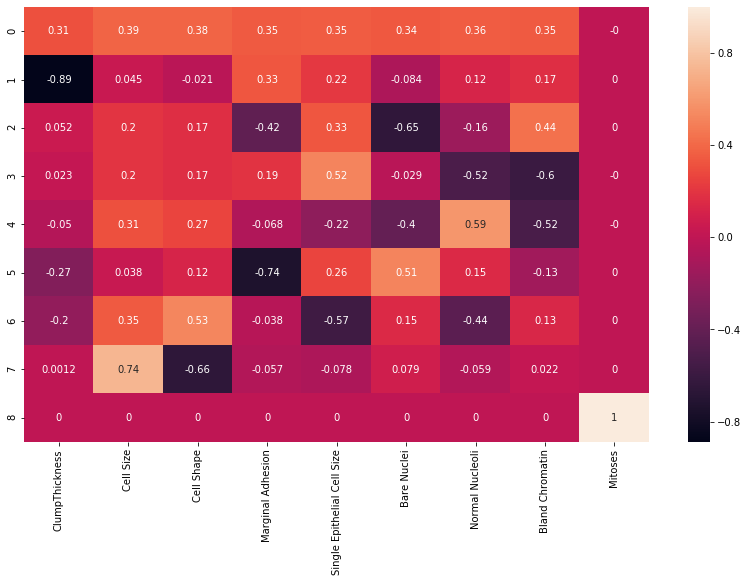

In [60]:
#Plot the heat map to check the components and features...the last one has no contribution from features
plt.figure(figsize=(14,8))
sns.heatmap(df_comp,annot=True)

In [61]:
#Lets fo a pair plot of the data using the PCA

P_reduce = np.array(eigvectors_sorted[0:8])   # Reducing from 9 to 7 dimension space

cancer_df_proj = np.dot(cancer_df_sc,P_reduce.T)   # projecting original data into principal component dimensions

proj_data_df = pd.DataFrame(cancer_df_proj)  # converting array to dataframe for pairplot

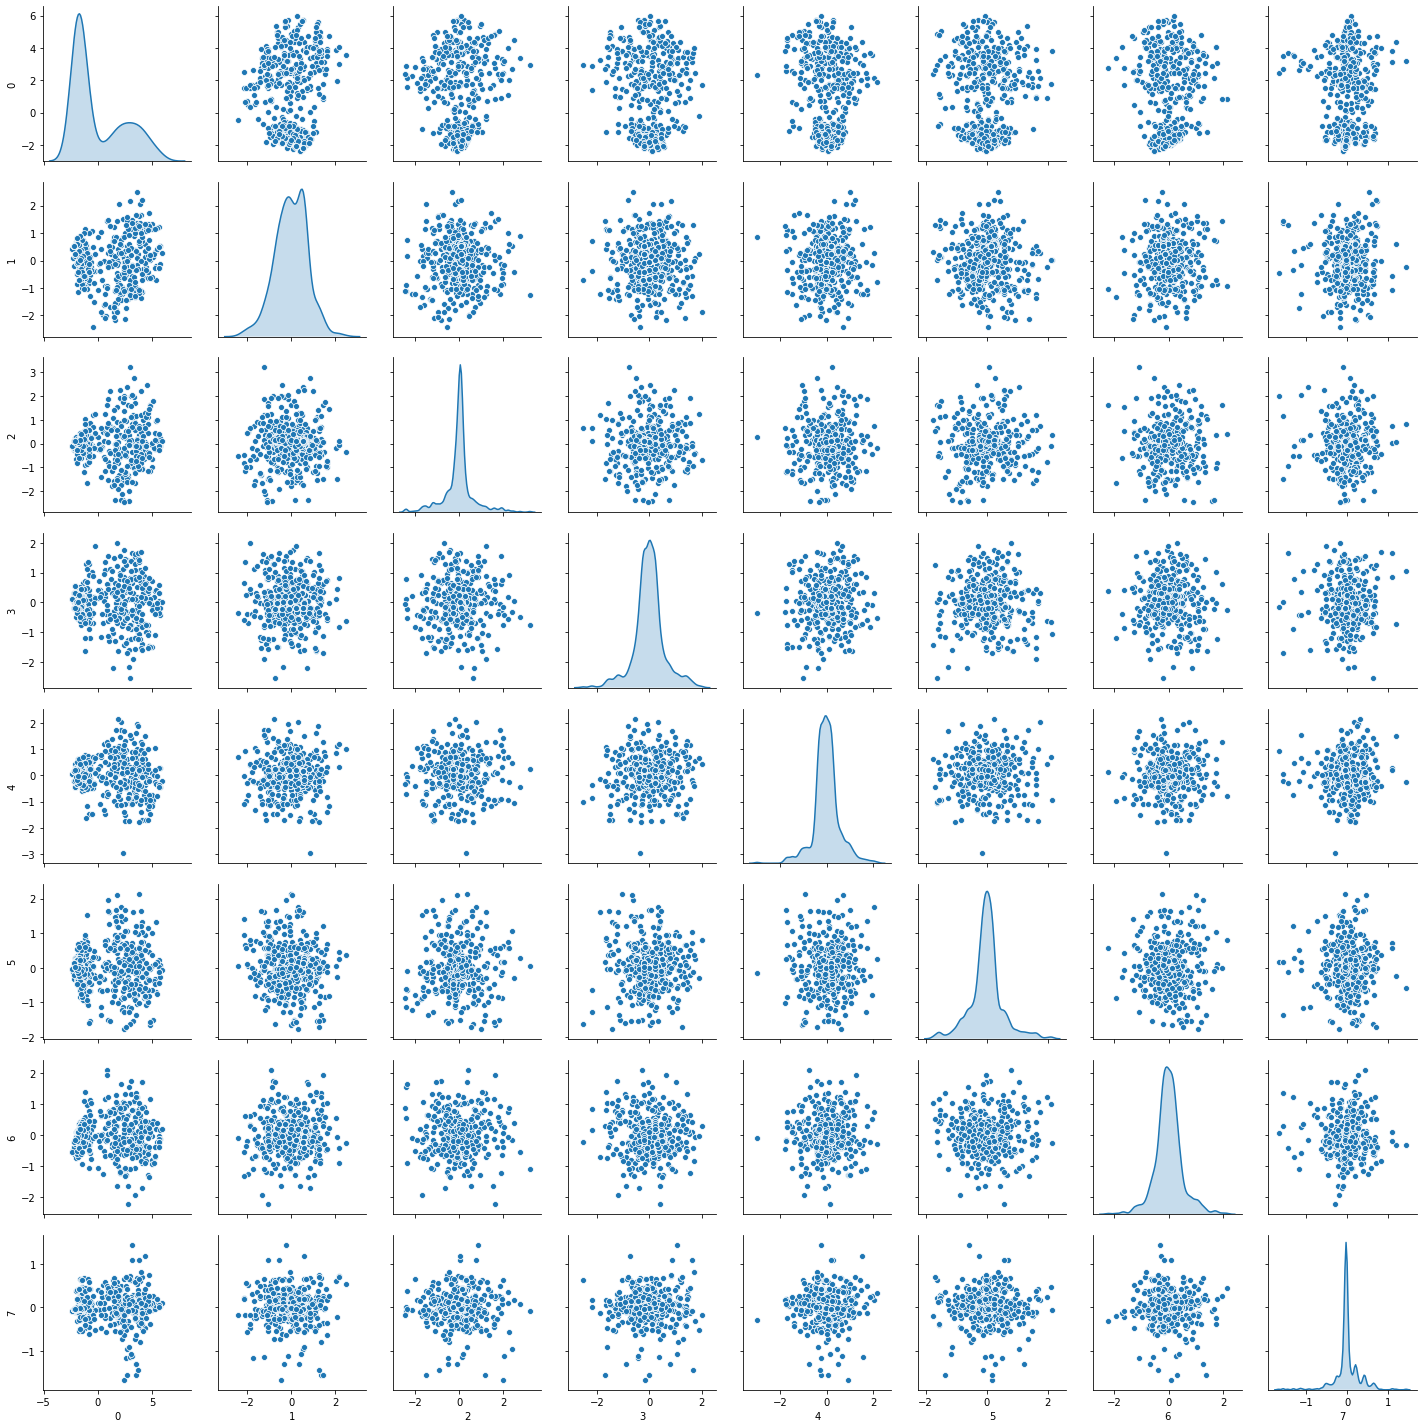

In [62]:
sns.pairplot(proj_data_df,diag_kind="kde")

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [63]:
#Load the dataset from local copy
jokes_df = pd.read_csv("jokes.csv")

#Sanity check
jokes_df.head(5)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [64]:
#Check the data charateristics
print("Shape of the dataset :",jokes_df.shape)

Shape of the dataset : (24983, 101)


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [65]:
#Get only the first 200 rows only
jokes_df = jokes_df.iloc[:201,1:]

#sanity check
jokes_df.shape

(201, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [66]:
jokes_df.replace(99.0,0,inplace=True)

#sanity check
jokes_df[jokes_df == 99.0].sum()

Joke1      0.0
Joke2      0.0
Joke3      0.0
Joke4      0.0
Joke5      0.0
Joke6      0.0
Joke7      0.0
Joke8      0.0
Joke9      0.0
Joke10     0.0
Joke11     0.0
Joke12     0.0
Joke13     0.0
Joke14     0.0
Joke15     0.0
Joke16     0.0
Joke17     0.0
Joke18     0.0
Joke19     0.0
Joke20     0.0
Joke21     0.0
Joke22     0.0
Joke23     0.0
Joke24     0.0
Joke25     0.0
Joke26     0.0
Joke27     0.0
Joke28     0.0
Joke29     0.0
Joke30     0.0
          ... 
Joke71     0.0
Joke72     0.0
Joke73     0.0
Joke74     0.0
Joke75     0.0
Joke76     0.0
Joke77     0.0
Joke78     0.0
Joke79     0.0
Joke80     0.0
Joke81     0.0
Joke82     0.0
Joke83     0.0
Joke84     0.0
Joke85     0.0
Joke86     0.0
Joke87     0.0
Joke88     0.0
Joke89     0.0
Joke90     0.0
Joke91     0.0
Joke92     0.0
Joke93     0.0
Joke94     0.0
Joke95     0.0
Joke96     0.0
Joke97     0.0
Joke98     0.0
Joke99     0.0
Joke100    0.0
Length: 100, dtype: float64

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [68]:
#Find mean of the all the columns, sort and get the top 10
print("Top 10 Jokes \n")
jokes_df.mean().sort_values(ascending=False).head(10)

Top 10 Jokes 



Joke50    4.070746
Joke36    3.630498
Joke53    3.553234
Joke35    3.246468
Joke29    3.205721
Joke27    3.079254
Joke49    2.875174
Joke62    2.801741
Joke32    2.766915
Joke31    2.643383
dtype: float64